# House Price Prediction


https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('houses_train.csv')

In [74]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
data.shape

(1460, 81)

__Filling in missing values:__

In [4]:
data.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

Following features were set to 1 or 0 (has or has not) regardless the type of pool, alley, fireplace,... etc.

In [5]:
data['PoolQC']=np.where(data['PoolQC']==np.nan,0,1)
data['MiscFeature']=np.where(data['MiscFeature']==np.nan,0,1)
data['Alley']=np.where(data['Alley']==np.nan,0,1)
data['Fence']=np.where(data['Fence']==np.nan,0,1)
data['FireplaceQu']=np.where(data['FireplaceQu']==np.nan,0,1)

Following features represent mostly the quality, so the strings were replaced with the quality level and NaNs with 0

In [6]:
gar_cond=dict(zip(['TA', 'Gd', 'Fa', 'Po','Ex',np.nan],[3,4,2,1,5,0]))
gar_type=dict(zip(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types',np.nan],[5,1,3,4,2,6,0]))
gar_fin=dict(zip(['Unf', 'RFn', 'Fin',np.nan],[1,2,3,0]))
basement_height=dict(zip(['TA', 'Fa', 'Gd', 'Po', 'Ex',np.nan],[85,75,95,65,105,0]))
basement_exp=dict(zip(['No', 'Av', 'Gd', 'Mn',np.nan],[1,3,4,2,0]))
basement_finish=dict(zip(['Unf', 'Rec', 'LwQ', 'BLQ', 'ALQ', 'GLQ',np.nan],[1,3,2,4,5,6,0]))
basement_cond=dict(zip(['TA', 'Gd', 'Fa', 'Po',np.nan,'Ex'],[3,4,2,1,0,5]))
masVnrType=dict(zip(['None', 'BrkFace', 'Stone', 'BrkCmn',np.nan],[0,2,1,3,0]))
electr=dict(zip(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix',np.nan],[5,4,3,2,1,5]))

In [7]:
data['GarageCond']=data['GarageCond'].replace(gar_cond)
data['GarageQual']=data['GarageQual'].replace(gar_cond)
data['GarageType']=data['GarageType'].replace(gar_type)
data['GarageFinish']=data['GarageFinish'].replace(gar_fin)
data['BsmtQual']=data['BsmtQual'].replace(basement_height)
data['BsmtExposure']=data['BsmtExposure'].replace(basement_exp)
data['BsmtFinType2']=data['BsmtFinType2'].replace(basement_finish)
data['BsmtFinType1']=data['BsmtFinType1'].replace(basement_finish)
data['BsmtCond']=data['BsmtCond'].replace(basement_cond)
data['MasVnrType']=data['MasVnrType'].replace(masVnrType)
data.MasVnrArea=data.MasVnrArea.fillna(0)
data['Electrical']=data['Electrical'].replace(electr)

LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [8]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [33]:
data.select_dtypes(include=['int64','int32','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrType', 'MasVnrArea',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

__Replacing categorical variables:__

In [34]:
data.select_dtypes(exclude=['int64','int32','float64']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtCond',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
msz=dict(zip(['RL', 'RM', 'FV', 'RH', 'C (all)'],[5,6,3,4,1]))
lotsh=dict(zip(['Reg', 'IR1', 'IR2', 'IR3'],[4,3,2,1]))
LandContour=dict(zip(['Lvl', 'Bnk', 'HLS', 'Low'],[4,3,2,1]))
LotConfig=dict(zip(['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3'],[1,2,3,4,5]))
BldgType=dict(zip(['1Fam', 'TwnhsE', 'Duplex', 'Twnhs', '2fmCon'],[5,2,3,1,4]))
HouseStyle=dict(zip(['1Story', '2Story', '1.5Fin', 'SLvl', 'SFoyer', '1.5Unf', '2.5Unf',
       '2.5Fin'],[1,2,1.5,0.5,0.5,1.2,2.2,2.5]))
RoofStyle=dict(zip(['Gable', 'Hip', 'Flat', 'Gambrel', 'Mansard', 'Shed'],[3,3,2,4,4,1]))
Exterior1st=dict(zip(['VinylSd', 'HdBoard', 'MetalSd', 'Wd Sdng', 'Plywood', 'CemntBd',
       'BrkFace', 'WdShing', 'Stucco', 'AsbShng', 'Stone', 'BrkComm', 'CBlock',
       'AsphShn', 'ImStucc'],[2,2,1,2,2,1,3,2,3,1,3,2,2,1,2]))
SaleType=dict(zip(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'ConLw', 'CWD', 'Oth', 'Con'],[2,3,4,1,1,1,1,1,1]))
SaleCondition=dict(zip(['Normal', 'Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand'],[2,1,2,1,2,2]))

In [10]:
data.MSZoning=data.MSZoning.replace(msz)
data.LotShape=data.LotShape.replace(lotsh)
data.LandContour=data.LandContour.replace(LandContour)
data.LotConfig=data.LotConfig.replace(LotConfig)
data.BldgType=data.BldgType.replace(BldgType)
data.HouseStyle=data.HouseStyle.replace(HouseStyle)
data.RoofStyle=data.RoofStyle.replace(RoofStyle)
data.Exterior1st=data.Exterior1st.replace(Exterior1st)
data.Exterior2nd=data.Exterior2nd.replace(Exterior1st)
data.ExterQual=data.ExterQual.replace(basement_cond)
data.ExterCond=data.ExterCond.replace(basement_cond)
data.HeatingQC=data.HeatingQC.replace(basement_cond)
data.KitchenQual=data.KitchenQual.replace(basement_cond)
data.SaleType=data.SaleType.replace(SaleType)
data.SaleCondition=data.SaleCondition.replace(SaleCondition)

__Removing variables with dominating categories:__

In [11]:
data=data.drop(['Street', 'Utilities',
        'LandSlope', 'Condition2',
       'RoofMatl',  'Heating',
        'CentralAir', 'PavedDrive','Functional','Exterior2nd'],1)

In [179]:
data.select_dtypes(exclude=['int64','int32','float64']).columns #left for One Hot Encoding

Index(['Neighborhood', 'Condition1', 'Foundation'], dtype='object')

__Checking the scale of variables:__

In [12]:
data.describe().T[20:40]

,count,mean,std,min,25%,50%,75%,max
ExterCond,1460.0,3.083562,0.351054,1.0,3.00,3.0,3.00,5.0
BsmtQual,1460.0,88.496575,15.777214,0.0,85.00,95.0,95.00,105.0
BsmtExposure,1460.0,1.630137,1.067391,0.0,1.00,1.0,2.00,4.0
BsmtFinType1,1460.0,3.545890,2.107776,0.0,1.00,4.0,6.00,6.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinType2,1460.0,1.247260,0.892332,0.0,1.00,1.0,1.00,6.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
HeatingQC,1460.0,4.145205,0.959501,1.0,3.00,5.0,5.00,5.0


__Data scaling:__

In [13]:
from sklearn.preprocessing import scale

In [19]:
area_scaled=scale(data['GrLivArea'])
bsmtBath_scaled=scale(data['BsmtFullBath'])
price_scaled=scale(data['SalePrice'])

In [20]:
area_scaled

array([ 0.37033344, -0.48251191,  0.51501256, ...,  1.56964722,
       -0.83278768, -0.49393395])

In [21]:
bsmtBath_scaled

array([ 1.10781015, -0.81996437,  1.10781015, ..., -0.81996437,
        1.10781015,  1.10781015])

In [18]:
price_scaled

array([ 0.34727322,  0.00728832,  0.53615372, ...,  1.07761115,
       -0.48852299, -0.42084081])

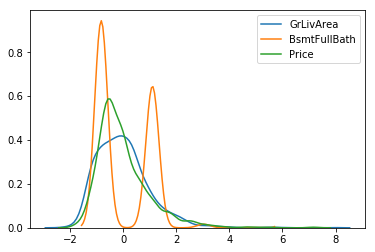

In [22]:
sns.distplot(area_scaled,hist=False,label='GrLivArea')
sns.distplot(bsmtBath_scaled,hist=False, label='BsmtFullBath')
sns.distplot(price_scaled,hist=False, label='Price')

__Data visualization:__

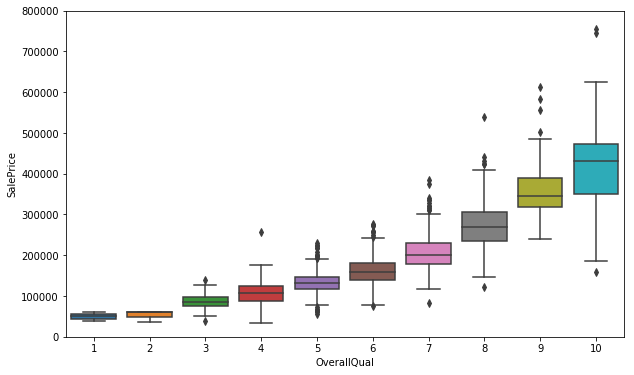

In [40]:
var = 'OverallQual'
data_box = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data_box)
fig.axis(ymin=0, ymax=800000);

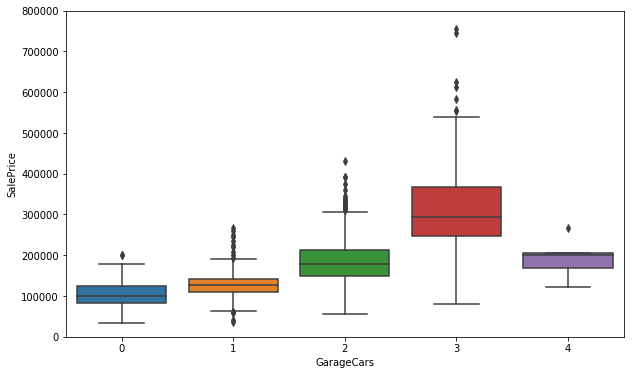

In [41]:
var = 'GarageCars'
data_box = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data_box)
fig.axis(ymin=0, ymax=800000);

__Linearity:__

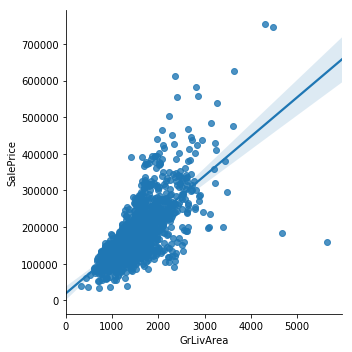

In [201]:
sns.lmplot(x='GrLivArea',y='SalePrice',data=data)

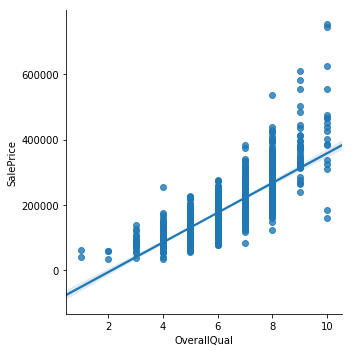

In [200]:
sns.lmplot(x='OverallQual',y='SalePrice',data=data)

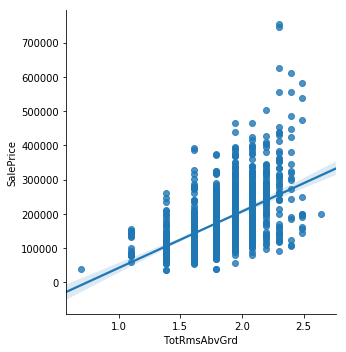

In [202]:
sns.lmplot(x='TotRmsAbvGrd',y='SalePrice',data=data)

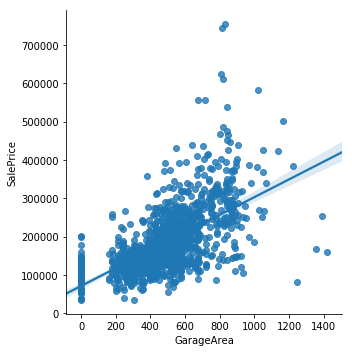

In [204]:
sns.lmplot(x='GarageArea',y='SalePrice',data=data)

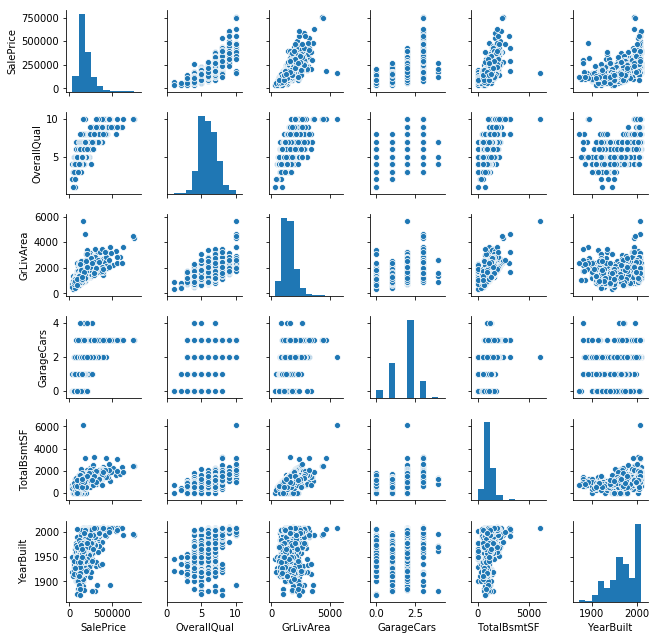

In [212]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(data[cols], height = 1.5)


__Correlations:__

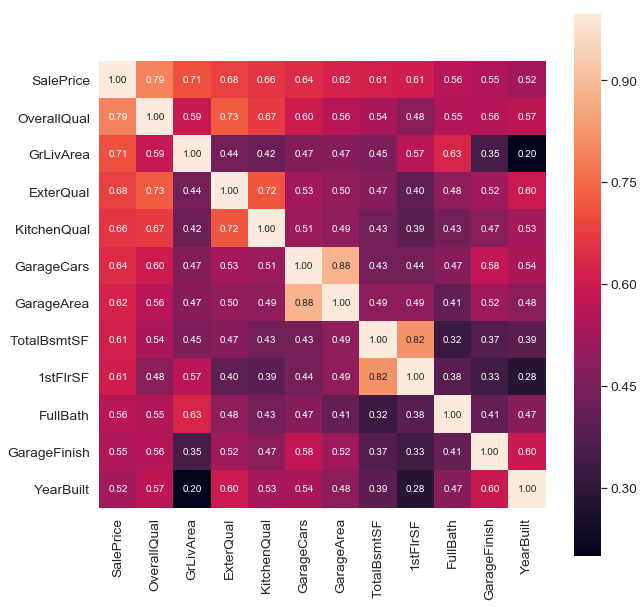

In [219]:
#Correlations of independent variables with the dependent variable
plt.figure(figsize=(10,10))
k = 12 #number of variables for heatmap
corrmat=data.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

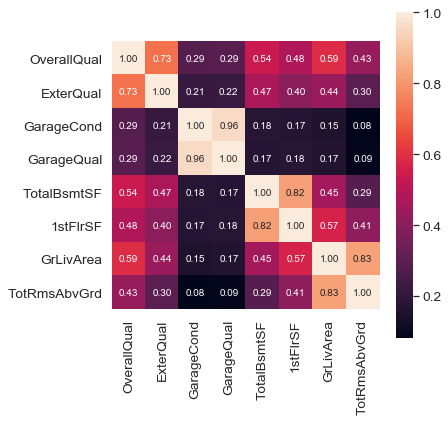

In [196]:
#correlations between independent variables can cause multicollinearity and have to be avoided
col_list=['OverallQual','ExterQual','GarageCond','GarageQual','TotalBsmtSF','1stFlrSF','GrLivArea','TotRmsAbvGrd']
plt.figure(figsize=(6,6))
cm = np.corrcoef(data[col_list].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=col_list, xticklabels=col_list)
plt.show()

__Dependent variable distribution:__

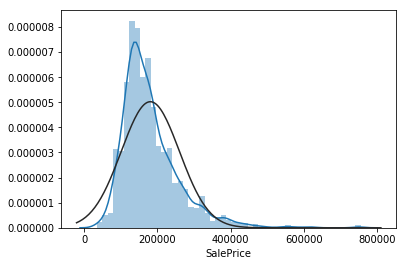

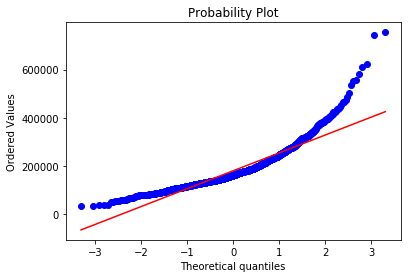

In [216]:
#dependent variable is skewed left
sns.distplot(data['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

In [4]:
_,p_value_n=stats.normaltest(data['SalePrice']) #normality test

In [5]:
p_value_n

2.283848353787728e-133